<a href="https://colab.research.google.com/github/jrfanfan/Android_temp_con/blob/main/notebooks/starter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [4]:
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [5]:
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['day'] = bikes['dteday'].dt.day
bikes['month'] = bikes['dteday'].dt.month
bikes['year'] = bikes['dteday'].dt.year



In [6]:
# The year 2023
bikes[bikes['dteday'].dt.year == 2023]


,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,day,month,year
105180,2023-01-01,0.0,57,77,12.2,12.2,0.9707,11.4,1,1,0,0,1,1,2023
105181,2023-01-01,1.0,96,100,11.3,11.3,0.9717,8.5,2,1,0,0,1,1,2023
105182,2023-01-01,2.0,107,74,10.3,10.3,0.9637,9.2,1,1,0,0,1,1,2023
105183,2023-01-01,3.0,46,34,10.7,10.7,0.9982,10.5,2,1,0,0,1,1,2023
105184,2023-01-01,4.0,11,15,8.6,7.0,0.9711,10.2,2,1,0,0,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1,31,10,2023
112471,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1,31,10,2023
112472,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1,31,10,2023
112473,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1,31,10,2023


In [7]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions

# Create a new dataframe called y that contians the target we're
# trying to predict

X = bikes.drop(columns=['dteday', 'day'])
y = bikes['day']



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [11]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer
model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='leaky_relu'))

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# opt = keras.optimizers.Adam(learning_rate=0.0001)
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
hist = pd.DataFrame(history.history)

Epoch 1/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 83.5970 - mse: 83.5970 - val_loss: 78.2134 - val_mse: 78.2134
Epoch 2/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 79.9588 - mse: 79.9588 - val_loss: 78.9538 - val_mse: 78.9538
Epoch 3/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 79.6797 - mse: 79.6797 - val_loss: 78.3527 - val_mse: 78.3527
Epoch 4/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 79.4625 - mse: 79.4625 - val_loss: 77.3813 - val_mse: 77.3813
Epoch 5/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 78.8053 - mse: 78.8053 - val_loss: 77.1905 - val_mse: 77.1905
Epoch 6/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 78.8825 - mse: 78.8825 - val_loss: 76.9638 - val_mse: 76.9638
Epoch 7/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 78.8442 - mse: 78.8442 - val_loss: 76.8541 - val_mse: 76.8541
Epoch 8/10
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 78.5767 - mse: 78.5767 - val_loss: 76.8305 - val_mse: 76.8305
Epo

In [15]:
# h = hist
hist = hist.reset_index()
# h

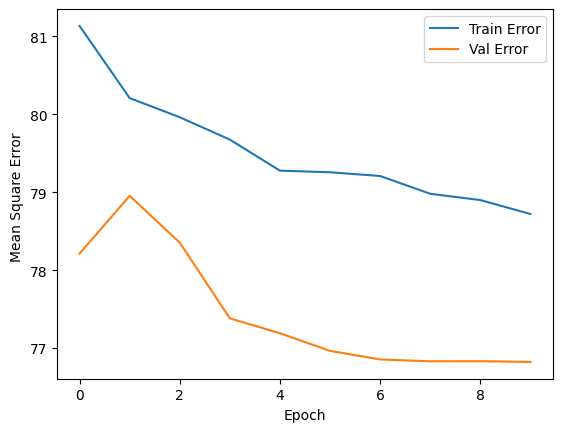

In [16]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()


plot_history()

In [17]:
predictions = np.round(model.predict(X_test),1)
predictions

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[15.8],
       [16. ],
       [16.1],
       ...,
       [15.9],
       [15.9],
       [15.9]], dtype=float32)

In [18]:
result = root_mean_squared_error(y_test, predictions)
result

8.778483390808105

In [19]:
r2 = r2_score(y_test,predictions)
r2

-5.1975250244140625e-05

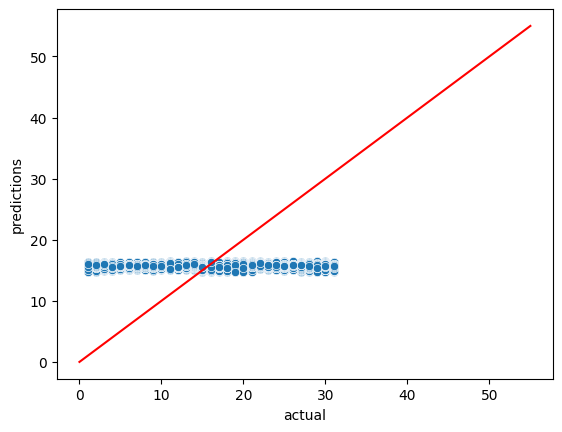

In [20]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()